In [4]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot




In [5]:
# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns
import tensorflow 
print(tensorflow.__version__)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Flatten
from functools import partial

2.8.2


In [6]:
df1 = pd.read_csv("reviews.csv")
df2 = pd.read_csv("product_data.csv")
print("Shape of the dataframe of reviews :",df1.shape)
print("Shape of the dataframe of products :",df2.shape)

Shape of the dataframe of reviews : (67986, 8)
Shape of the dataframe of products : (720, 10)


In [7]:
print("data type of reviews \n",df1.dtypes)
print('*'*100)
print("data type of products \n",df2.dtypes)

data type of reviews 
 asin             object
name             object
rating            int64
date             object
verified           bool
title            object
body             object
helpfulVotes    float64
dtype: object
****************************************************************************************************
data type of products 
 asin              object
brand             object
title             object
url               object
image             object
rating           float64
reviewUrl         object
totalReviews       int64
price            float64
originalPrice    float64
dtype: object


In [8]:
df1 = df1[['asin','rating','title','body']]
df1.head()

,asin,rating,title,body
0,B0000SX2UC,3,"Def not best, but not worst",I had the Samsung A600 for awhile which is abs...
1,B0000SX2UC,1,Text Messaging Doesn't Work,Due to a software issue between Nokia and Spri...
2,B0000SX2UC,5,Love This Phone,"This is a great, reliable phone. I also purcha..."
3,B0000SX2UC,3,"Love the Phone, BUT...!","I love the phone and all, because I really did..."
4,B0000SX2UC,4,"Great phone service and options, lousy case!",The phone has been great for every purpose it ...


In [9]:
df2 = df2[['asin','brand']]
df2.head()

,asin,brand
0,B0000SX2UC,NaN
1,B0009N5L7K,Motorola
2,B000SKTZ0S,Motorola
3,B001AO4OUC,Motorola
4,B001DCJAJG,Motorola


In [10]:
def missing_values(x):
    print(x.isnull().sum())
missing_values(df1)


asin       0
rating     0
title     14
body      21
dtype: int64


In [11]:
missing_values(df2)

asin     0
brand    4
dtype: int64


In [12]:
df1 = df1.dropna()
missing_values(df1)

asin      0
rating    0
title     0
body      0
dtype: int64


In [13]:
df2 = df2.dropna()
missing_values(df2)

asin     0
brand    0
dtype: int64


In [14]:
df = pd.merge(df1,df2, on = 'asin')
df.head()

,asin,rating,title,body,brand
0,B0009N5L7K,1,Stupid phone,DON'T BUY OUT OF SERVICE,Motorola
1,B0009N5L7K,4,Exellent Service,I have been with nextel for nearly a year now ...,Motorola
2,B0009N5L7K,5,I love it,"I just got it and have to say its easy to use,...",Motorola
3,B0009N5L7K,1,Phones locked,1 star because the phones locked so I have to ...,Motorola
4,B0009N5L7K,5,Excellent product,The product has been very good. I had used thi...,Motorola


In [15]:
def statistical_summary(df):
    print(df.describe())
statistical_summary(df)

             rating
count  67756.000000
mean       3.807840
std        1.583129
min        1.000000
25%        3.000000
50%        5.000000
75%        5.000000
max        5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


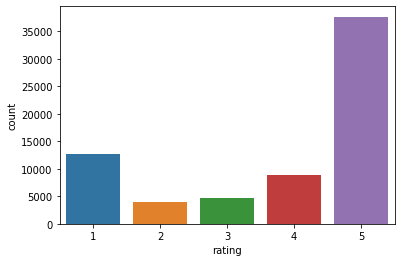

In [16]:
import seaborn as sns


sns.countplot(df['rating'])

(array([ 8879.,  5914., 33604.,  2225.,  3195.,  5144.,  3786.,   251.,
          347.,  4411.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

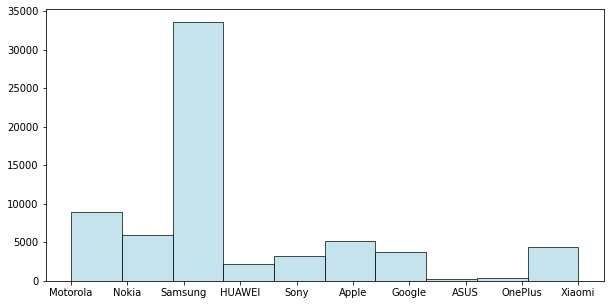

In [17]:
plt.figure(figsize= (10,5))
plt.hist(df.brand, color='lightblue', edgecolor = 'black', alpha = 0.7)

(array([12708.,     0.,  3894.,     0.,     0.,  4738.,     0.,  8786.,
            0., 37630.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

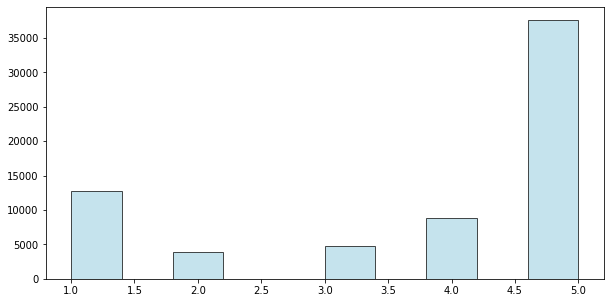

In [18]:
plt.figure(figsize= (10,5))
plt.hist(df.rating, color='lightblue', edgecolor = 'black', alpha = 0.7)

In [19]:
def assigning_values(x):
    if x >3:
        return 1
    elif x <3:
        return -1
    elif x == 3:
        return 0
df['Sentiment']= df['rating'].map(assigning_values)
df['Sentiment'].head()

0   -1
1    1
2    1
3   -1
4    1
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


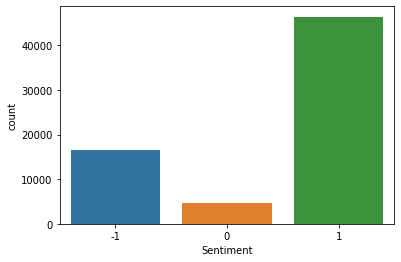

In [20]:
sns.countplot(df['Sentiment'])

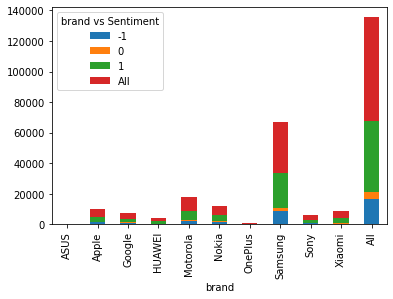

<Figure size 720x720 with 0 Axes>

In [21]:
country_crosstab=pd.crosstab(df['brand'],df['Sentiment'], margins=True)

country_crosstab.plot.bar(stacked=True)

plt.legend(title='brand vs Sentiment')
plt.figure(figsize= (10,10))
plt.show()

In [22]:
new_df = df[['title','body']]
new_df.head()

,title,body
0,Stupid phone,DON'T BUY OUT OF SERVICE
1,Exellent Service,I have been with nextel for nearly a year now ...
2,I love it,"I just got it and have to say its easy to use,..."
3,Phones locked,1 star because the phones locked so I have to ...
4,Excellent product,The product has been very good. I had used thi...


In [23]:
new_df= new_df.apply(lambda x: x.astype(str).str.lower())
new_df.head() 

,title,body
0,stupid phone,don't buy out of service
1,exellent service,i have been with nextel for nearly a year now ...
2,i love it,"i just got it and have to say its easy to use,..."
3,phones locked,1 star because the phones locked so i have to ...
4,excellent product,the product has been very good. i had used thi...


In [24]:
import re
new_df['title'] = new_df['title'].apply(lambda x: re.findall("[\w']+", x))
new_df['title']

0                                          [stupid, phone]
1                                      [exellent, service]
2                                            [i, love, it]
3                                         [phones, locked]
4                                     [excellent, product]
                               ...                        
67751    [awesome, phone, but, finger, scanner, is, a, ...
67752                                    [simply, amazing]
67753    [great, phon3, but, many, bugs, need, to, fix,...
67754                               [phone, is, like, new]
67755                [outstanding, phone, for, the, price]
Name: title, Length: 67756, dtype: object

In [25]:
new_df['body'] = new_df['body'].apply(lambda x: re.findall("[\w']+", x))
new_df['body']

0                           [don't, buy, out, of, service]
1        [i, have, been, with, nextel, for, nearly, a, ...
2        [i, just, got, it, and, have, to, say, its, ea...
3        [1, star, because, the, phones, locked, so, i,...
4        [the, product, has, been, very, good, i, had, ...
                               ...                        
67751    [i, love, the, camera, on, this, phone, the, s...
67752    [i've, been, an, xperia, user, for, several, y...
67753                    [buy, one, more, for, my, cousin]
67754    [product, looks, and, works, like, new, very, ...
67755    [i, love, the, size, and, style, of, this, pho...
Name: body, Length: 67756, dtype: object

In [26]:
new_df.head()

,title,body
0,"[stupid, phone]","[don't, buy, out, of, service]"
1,"[exellent, service]","[i, have, been, with, nextel, for, nearly, a, ..."
2,"[i, love, it]","[i, just, got, it, and, have, to, say, its, ea..."
3,"[phones, locked]","[1, star, because, the, phones, locked, so, i,..."
4,"[excellent, product]","[the, product, has, been, very, good, i, had, ..."


In [27]:
import nltk
nltk.download('stopwords')



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [28]:
stop_words = nltk.corpus.stopwords.words("english")

stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
def remove_stopwords(x):
  return [w.lower() for w in x if not w.lower() in stop_words]
  
new_df['title'] = new_df['title'].map(remove_stopwords)
new_df['body'] = new_df['body'].map(remove_stopwords)
new_df.head()

,title,body
0,"[stupid, phone]","[buy, service]"
1,"[exellent, service]","[nextel, nearly, year, started, time, last, ye..."
2,[love],"[got, say, easy, use, hear, person, talking, f..."
3,"[phones, locked]","[1, star, phones, locked, pay, additional, fee..."
4,"[excellent, product]","[product, good, used, cell, phone, one, projec..."


In [30]:
new_df['body'] =new_df['body'].apply(lambda x: ' '.join(x))
new_df.head()

,title,body
0,"[stupid, phone]",buy service
1,"[exellent, service]",nextel nearly year started time last year moto...
2,[love],got say easy use hear person talking fine prob...
3,"[phones, locked]",1 star phones locked pay additional fees unlock
4,"[excellent, product]",product good used cell phone one projects work...


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
# tf_idf = TfidfVectorizer(ngram_range =(1,2))
vectorizer = TfidfVectorizer(max_features= 100)
X = vectorizer.fit_transform(new_df['body'])
X.todense().shape

(67756, 100)

In [32]:
x = pd.DataFrame(X.todense(), columns=vectorizer.get_feature_names())
x

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,also,amazing,amazon,android,another,app,apps,back,battery,best,...,ve,verizon,want,way,well,without,work,working,works,would
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.696,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67751,0.0,0.0,0.0,0.243258,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000000,0.0,0.0,0.264226,0.0,0.0,0.0,0.0,0.195660,0.199714
67752,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.249216,0.0,0.0,0.557078,0.0,0.0,0.0,0.0,0.000000,0.000000
67753,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000
67754,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.329969,0.000000


In [33]:
print(X.shape)

(67756, 100)


In [34]:
Y = df['Sentiment']

Y.shape

(67756,)

In [35]:
final = x 
final['Target'] = Y

In [36]:
final.to_csv('New.csv', index=False)

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3 )

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((47429, 100), (20327, 100), (47429,), (20327,))

Accuracy score (LR):  0.7880159393909578
              precision    recall  f1-score   support

          -1       0.67      0.63      0.65      4968
           0       1.00      0.00      0.00      1389
           1       0.82      0.92      0.87     13970

    accuracy                           0.79     20327
   macro avg       0.83      0.52      0.51     20327
weighted avg       0.80      0.79      0.76     20327



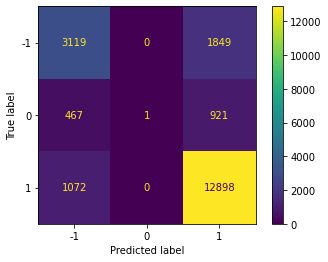

In [39]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score



classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)
y_pred_lr = classifier.predict(x_test)
LR_score = accuracy_score(y_test, y_pred_lr)
print("Accuracy score (LR): ", LR_score)

LR_accuracy_matrix = confusion_matrix(y_test, y_pred_lr)
cmd = ConfusionMatrixDisplay(LR_accuracy_matrix, display_labels=['-1','0','1'])
cmd.plot()

print(classification_report(y_test, y_pred_lr))




Accuracy score (NB) 66.0
              precision    recall  f1-score   support

          -1       0.58      0.69      0.63      4968
           0       0.12      0.29      0.16      1389
           1       0.88      0.69      0.78     13970

    accuracy                           0.66     20327
   macro avg       0.53      0.56      0.52     20327
weighted avg       0.76      0.66      0.70     20327



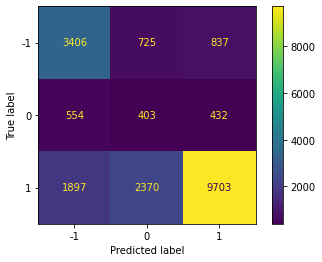

In [40]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(x_train.toarray(), y_train)

y_pred=NB_model.predict(x_train.toarray())
NB_Accuracy_Train = 100*round(accuracy_score(y_true=y_train, y_pred=y_pred),2)
NB_Tr=str(NB_Accuracy_Train)

y_pred = NB_model.predict(x_test.toarray())
NB_Accuracy_Test = 100*round(accuracy_score(y_true=y_test, y_pred=y_pred),2)
print('Accuracy score (NB)',NB_Accuracy_Test)

NB_accuracy_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(NB_accuracy_matrix, display_labels=['-1','0','1'])
cmd.plot()

print(classification_report(y_test, y_pred))

Accuracy score (SVM):  0.7857037437890491
              precision    recall  f1-score   support

          -1       0.67      0.62      0.64      4968
           0       0.00      0.00      0.00      1389
           1       0.82      0.92      0.87     13970

    accuracy                           0.79     20327
   macro avg       0.50      0.51      0.50     20327
weighted avg       0.73      0.79      0.75     20327



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


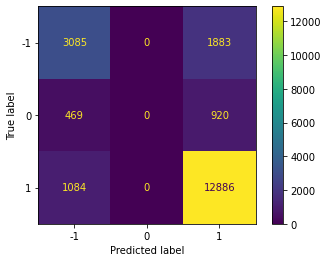

In [41]:
from sklearn.svm import SVC 
from sklearn import svm

svm_model = svm.SVC(kernel='linear',probability = True)
svm_model.fit(x_train, y_train)

y_pred_svm = svm_model.predict(x_test)

svm_score = accuracy_score(y_test, y_pred_svm)

print("Accuracy score (SVM): ", svm_score)

SVM_accuracy_matrix = confusion_matrix(y_test, y_pred_svm)
cmd = ConfusionMatrixDisplay(SVM_accuracy_matrix, display_labels=['-1','0','1'])
cmd.plot()

print(classification_report(y_test, y_pred_svm))

Accuracy score (DT):  0.7342450927338023
              precision    recall  f1-score   support

          -1       0.59      0.55      0.57      4968
           0       0.16      0.12      0.13      1389
           1       0.82      0.86      0.84     13970

    accuracy                           0.73     20327
   macro avg       0.52      0.51      0.52     20327
weighted avg       0.72      0.73      0.73     20327



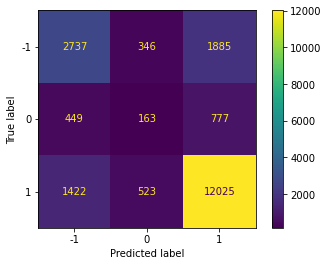

In [42]:
from sklearn.tree import DecisionTreeClassifier

DT_model=DecisionTreeClassifier(splitter='best')
DT_model.fit(x_train, y_train)

y_pred = DT_model.predict(x_test)
DT_Accuracy_Test = (accuracy_score(y_true=y_test, y_pred=y_pred))
print("Accuracy score (DT): ", DT_Accuracy_Test)

DT_accuracy_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(DT_accuracy_matrix, display_labels=['-1','0','1'])
cmd.plot()

print(classification_report(y_test, y_pred))


Accuracy score (Randon Forest):  0.6872632459290599
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00      4968
           0       0.00      0.00      0.00      1389
           1       0.69      1.00      0.81     13970

    accuracy                           0.69     20327
   macro avg       0.23      0.33      0.27     20327
weighted avg       0.47      0.69      0.56     20327



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


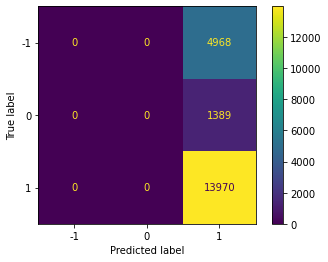

In [43]:
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier(max_depth=2, random_state=0)
rf_model.fit(x_train, y_train)
y_pred_rf = rf_model.predict(x_test)
rf_score = accuracy_score(y_test, y_pred_rf)
print("Accuracy score (Randon Forest): ", rf_score)

RF_accuracy_matrix = confusion_matrix(y_test, y_pred_rf)
cmd = ConfusionMatrixDisplay(RF_accuracy_matrix, display_labels=['-1','0','1'])
cmd.plot()

print(classification_report(y_test, y_pred_rf))

Accuracy score (ADA Boosting):  0.7749790918482806
              precision    recall  f1-score   support

          -1       0.65      0.58      0.61      4968
           0       0.25      0.00      0.00      1389
           1       0.81      0.92      0.86     13970

    accuracy                           0.77     20327
   macro avg       0.57      0.50      0.49     20327
weighted avg       0.73      0.77      0.74     20327



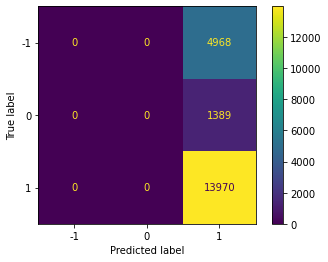

In [44]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

ADB_model = AdaBoostClassifier()
ADB_model.fit(x_train, y_train)


y_pred = ADB_model.predict(x_test)
ADB_Accuracy_Test = (accuracy_score(y_true=y_test, y_pred=y_pred))
print("Accuracy score (ADA Boosting): ", ADB_Accuracy_Test)

ADB_accuracy_matrix = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(RF_accuracy_matrix, display_labels=['-1','0','1'])
cmd.plot()

print(classification_report(y_test, y_pred))